In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [99]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [63]:
len(X_train)

60000

In [64]:
X_train[0].shape

(28, 28)

In [65]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

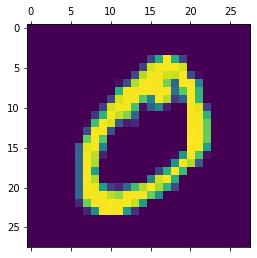

In [66]:
plt.matshow(X_train[3])

In [67]:
y_train[1]

0

In [68]:
X_train.shape

(60000, 28, 28)

In [94]:
# X_train = X_train/255
# y_train = y_train/255

In [97]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

In [102]:
model = keras.Sequential([
      keras.layers.Dense(10,input_shape=(X_train_flat.shape[1],),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4660 - accuracy: 0.8780
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9159
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9256
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2626 - accuracy: 0.9269
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9278


In [103]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 52.8835 - accuracy: 0.9042


[52.883480072021484, 0.90420001745224]

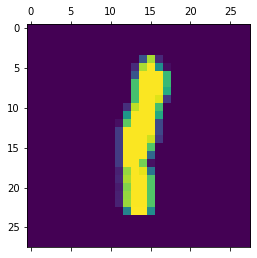

In [116]:
plt.matshow(X_test[39])

In [105]:
y_pred = model.predict(X_test_flat)
y_pred[32]

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [117]:
np.argmax(y_pred[39])

1

In [118]:
y_pred

array([[0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [1.       , 0.       , 1.       , ..., 0.       , 0.9823698,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 1.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        1.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [119]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [121]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [123]:
y_pred_labels[:5]

[3, 0, 1, 0, 4]

In [128]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    1,    0,    1,    1,    0,    2,    0],
       [   0, 1122,    5,    1,    1,    1,    3,    0,    2,    0],
       [  88,  100,  813,    5,    9,    0,    3,    3,    9,    2],
       [  44,    4,  258,  694,    1,    2,    0,    2,    5,    0],
       [  10,    2,   14,   28,  916,    0,    3,    1,    8,    0],
       [  76,    6,   36,  299,   25,  418,    7,    2,   22,    1],
       [  90,    3,  271,    4,   54,   40,  495,    0,    1,    0],
       [  23,   17,   75,  433,   57,    5,    0,  412,    6,    0],
       [  21,   30,  119,  225,   22,   72,   19,   12,  454,    0],
       [  15,   11,    3,  156,  463,    4,    0,  200,   92,   65]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

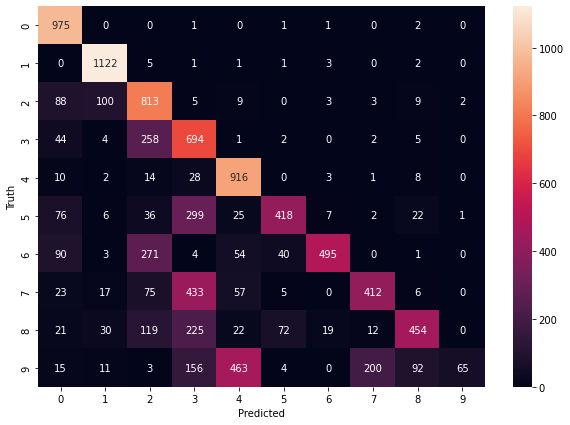

In [129]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [131]:
model = keras.Sequential([
      keras.layers.Dense(100,input_shape=(X_train_flat.shape[1],),activation='ReLU'),
      keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2773 - accuracy: 0.9213
Epoch 2/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1280 - accuracy: 0.9621
Epoch 3/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0877 - accuracy: 0.9741
Epoch 4/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9845
Epoch 6/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0432 - accuracy: 0.9866
Epoch 7/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0348 - accuracy: 0.9894


In [136]:
y_pred = model.predict(X_test_flat)

In [137]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.4131 - accuracy: 0.9753


[14.41312313079834, 0.9753000140190125]

In [138]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [139]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    1,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1, 1132,    0,    0,    0,    1,    1,    0,    0,    0],
       [  72,  406,  552,    1,    0,    0,    0,    0,    1,    0],
       [   4,  172,  123,  710,    0,    1,    0,    0,    0,    0],
       [  24,   18,   34,    0,  905,    0,    0,    1,    0,    0],
       [   6,   48,    2,  397,    7,  431,    0,    1,    0,    0],
       [ 309,   13,  189,   17,  139,  197,   94,    0,    0,    0],
       [  12,  162,  216,  284,   13,    4,    0,  337,    0,    0],
       [  45,   16,  190,  217,   21,   47,   15,    4,  418,    1],
       [  14,   27,    7,   80,  298,   11,    0,  131,   57,  384]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

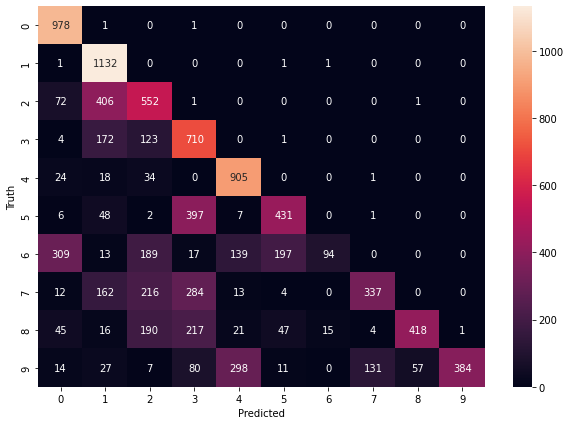

In [140]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
model = keras.Sequential([
      keras.layers.Dense(100,input_shape=(X_train_flat.shape[1],),activation='ReLU'),
      keras.layers.Dense(10,activation='sigmoid'),
      keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6850 - accuracy: 0.8824
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2003 - accuracy: 0.9549
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9686
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0938 - accuracy: 0.9758
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0756 - accuracy: 0.9805
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9835
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9857
